# TRANSFER LEARNING
*How to deploy accurate deep learning models in a timesaving way.*


## DESCRIPTION
According to Andrew Ng, co-founder of Google Brain, transfer learning will be - after supervised learning - the next driver of machine learning commercial success. 

When developing deep learning models for business applications (computer vision, speech recognition, etc) three obstacles usually occur : 
* Data availability : getting vast amounts of labeled data is hard. Most deep learning models which solve complex problems, need a whole lot of data. Getting vast amounts of labeled data for supervised models can be really difficult, considering the time and effort it takes to label data points.
* Performance : Efficient deep learning models don't generalize well at all. Most deep learning models are very specialized to a particular domain or even a specific task. While these might be state-of-the-art models, with really high accuracy and beating all benchmarks, it would be only on very specific datasets and end up suffering loss in performance when used in a new task which might still be similar to the one it was trained on.
* Costs : even with data and efficient models, training is computationally intensive. The most complex models take weeks to train using hundreds of machines equipped with expensive GPUs.

Transfer learning allows us to build accurate models in a timesaving way. Instead of starting the learning process from scratch, you start from patterns that have been learned when solving a different problem. This master class will show you how. 


In this notebook we will classify pictures of dogs and cats from the Kaggle competition dataset [Dogs vs. Cats"](https://www.kaggle.com/c/dogs-vs-cats), using the VGG-16 model pre-trained on the imagenet dataset and obtained through Keras library.

We compare the results of three different models, the first one using only VGG-16 for feature extration with the VGG layers frozen during training, the second one is similar to the first one with the addition of data augmentation, and the last model has the block 4 & 5 of the VGG unfrozen and data augmentation during its training.

Finaly we compare the the results of the three models.

## Notebook Layout

1. Import Data and VGG model
2. Transfer as feature extration only
3. Transfer with data augmentation
4. Transfer with partial training
5. Model comparaison

### 1. Import Data and VGG model

In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
%matplotlib inline

Using TensorFlow backend.


In [2]:
IMG_DIM = (150, 150) #setting image dim

train_files = glob.glob('training_data/*') #import training data
train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_files] #change images files into arrays
train_imgs = np.array(train_imgs)
train_labels = [fn.split('/')[1].split('.')[0].strip() for fn in train_files] #take the 'dog'/'cat' off file name for labels

validation_files = glob.glob('validation_data/*') #import training data
validation_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in validation_files] #change image files into arrays
validation_imgs = np.array(validation_imgs)
validation_labels = [fn.split('/')[1].split('.')[0].strip() for fn in validation_files] #take the 'dog'/'cat' off file name for labels

print('Train dataset shape:', train_imgs.shape, 
      '\tValidation dataset shape:', validation_imgs.shape)

Train dataset shape: (3000, 150, 150, 3) 	Validation dataset shape: (1000, 150, 150, 3)


(150, 150, 3)


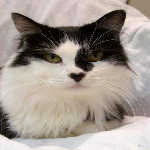

In [3]:
# Changing pixel values from (0,255) to (0,1)
# deep learning works better with small inputs

train_imgs_scaled = train_imgs.astype('float32')
validation_imgs_scaled  = validation_imgs.astype('float32')
train_imgs_scaled /= 255
validation_imgs_scaled /= 255

print(train_imgs[0].shape)
array_to_img(train_imgs[0])

In [4]:
batch_size = 30
num_classes = 2
epochs = 30
input_shape = (150, 150, 3)

In [5]:
# encode text category labels
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_labels)
train_labels_enc = le.transform(train_labels)
validation_labels_enc = le.transform(validation_labels)

print(train_labels[1495:1505], train_labels_enc[1495:1505])

['cat', 'dog', 'dog', 'dog', 'cat', 'cat', 'dog', 'cat', 'dog', 'cat'] [0 1 1 1 0 0 1 0 1 0]


In [6]:
# import trained VGG-16 model from keras

from keras.applications import vgg16
from keras.models import Model
import keras

vgg = vgg16.VGG16(include_top=False, weights='imagenet', 
                                     input_shape=input_shape)

# flattening output results so we can feed it to fully connected layers (our classifier)
output = vgg.layers[-1].output
output = keras.layers.Flatten()(output)
vgg_model = Model(vgg.input, output)

# freezing layers of our vgg so weights don't change during training
vgg_model.trainable = False
for layer in vgg_model.layers:
    layer.trainable = False

# taking a look at our vgg model layers
import pandas as pd
pd.set_option('max_colwidth', -1)
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])  

,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x7f1b66406128>,input_1,False
1,<keras.layers.convolutional.Conv2D object at 0x7f1b66406320>,block1_conv1,False
2,<keras.layers.convolutional.Conv2D object at 0x7f1b66406390>,block1_conv2,False
3,<keras.layers.pooling.MaxPooling2D object at 0x7f1b66406a90>,block1_pool,False
4,<keras.layers.convolutional.Conv2D object at 0x7f1b66406b00>,block2_conv1,False
5,<keras.layers.convolutional.Conv2D object at 0x7f1b65b589b0>,block2_conv2,False
6,<keras.layers.pooling.MaxPooling2D object at 0x7f1b65b6fa58>,block2_pool,False
7,<keras.layers.convolutional.Conv2D object at 0x7f1b65b6f0b8>,block3_conv1,False
8,<keras.layers.convolutional.Conv2D object at 0x7f1b65b17dd8>,block3_conv2,False
9,<keras.layers.convolutional.Conv2D object at 0x7f1b65b30b38>,block3_conv3,False


(1, 4, 4, 512)


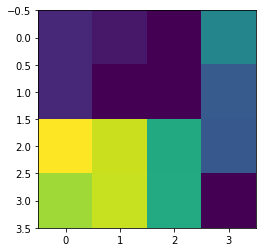

In [7]:
bottleneck_feature_example = vgg.predict(train_imgs_scaled[0:1])
print(bottleneck_feature_example.shape)
plt.imshow(bottleneck_feature_example[0][:,:,0])

### 2. Transfer learning only for feature extration

In [33]:
# Using our vgg model to extract features out off training data

def get_bottleneck_features(model, input_imgs):
    features = model.predict(input_imgs, verbose=0)
    return features
    
train_features_vgg = get_bottleneck_features(vgg_model, train_imgs_scaled)
validation_features_vgg = get_bottleneck_features(vgg_model, validation_imgs_scaled)

print('Train Bottleneck Features:', train_features_vgg.shape, 
      '\tValidation Bottleneck Features:', validation_features_vgg.shape)

Train Bottleneck Features: (3000, 8192) 	Validation Bottleneck Features: (1000, 8192)


In [34]:
# Creating a simple ANN (our classifier) to which we will feed the features we extrated through our vgg model

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

input_shape = vgg_model.output_shape[1]

model = Sequential()
model.add(InputLayer(input_shape=(input_shape,)))
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 512)               4194816   
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 513       
Total params: 4,457,985
Trainable params: 4,457,985
Non-trainable params: 0
_________________________________________________________________


In [35]:
# Training our ANN
history = model.fit(x=train_features_vgg, y=train_labels_enc,
                    validation_data=(validation_features_vgg, validation_labels_enc),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Train on 3000 samples, validate on 1000 samples
Epoch 1/30
3000/3000 [==============================] - 2s 669us/step - loss: 0.4342 - accuracy: 0.7873 - val_loss: 0.2886 - val_accuracy: 0.8700
Epoch 2/30
3000/3000 [==============================] - 2s 506us/step - loss: 0.2925 - accuracy: 0.8650 - val_loss: 0.2444 - val_accuracy: 0.8960
Epoch 3/30
3000/3000 [==============================] - 2s 512us/step - loss: 0.2427 - accuracy: 0.8930 - val_loss: 0.3969 - val_accuracy: 0.8260
Epoch 4/30
3000/3000 [==============================] - 2s 510us/step - loss: 0.1961 - accuracy: 0.9160 - val_loss: 0.2431 - val_accuracy: 0.8900
Epoch 5/30
3000/3000 [==============================] - 2s 516us/step - loss: 0.1568 - accuracy: 0.9393 - val_loss: 0.4507 - val_accuracy: 0.8250
Epoch 6/30
3000/3000 [==============================] - 2s 512us/step - loss: 0.1479 - accuracy: 0.9413 - val_loss: 0.2479 - val_accuracy: 0.8910
Epoch 7/30
3000/3000 [==============================] - 2s 513us/step - loss

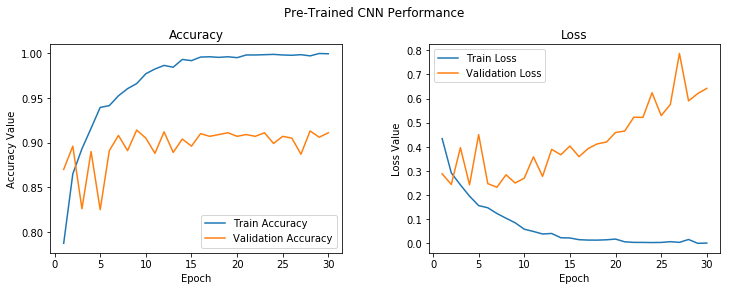

In [36]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Pre-Trained CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,31))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [37]:
model.save('cats_dogs_tlearn_basic_cnn.h5')

### 3. Transfer with data augmentation

In [16]:
# Creating our data generator
# It creates a new variation of each image at each epoch
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(train_imgs, train_labels_enc, batch_size=30)
val_generator = val_datagen.flow(validation_imgs, validation_labels_enc, batch_size=20)

Labels: ['dog', 'dog', 'dog', 'dog', 'dog']


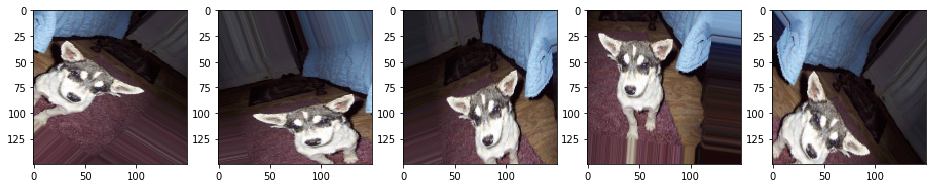

In [17]:
# Visualizing the transformations
img_id = 2595
img_generator = train_datagen.flow(train_imgs[img_id:img_id+1], train_labels[img_id:img_id+1],
                                   batch_size=1)
rdm_img = [next(img_generator) for i in range(0,5)]
fig, ax = plt.subplots(1,5, figsize=(16, 6))
print('Labels:', [item[1][0] for item in rdm_img])
l = [ax[i].imshow(rdm_img[i][0][0]) for i in range(0,5)]

In [19]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

model = Sequential()
model.add(vgg_model)
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])
              
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30,
                              validation_data=val_generator, validation_steps=50, 
                              verbose=1) 

Epoch 1/30
100/100 [==============================] - 80s 798ms/step - loss: 0.6707 - accuracy: 0.5870 - val_loss: 0.5373 - val_accuracy: 0.8190
Epoch 2/30
100/100 [==============================] - 78s 776ms/step - loss: 0.5843 - accuracy: 0.6847 - val_loss: 0.4465 - val_accuracy: 0.8410
Epoch 3/30
100/100 [==============================] - 78s 785ms/step - loss: 0.5263 - accuracy: 0.7307 - val_loss: 0.3632 - val_accuracy: 0.8450
Epoch 4/30
100/100 [==============================] - 79s 786ms/step - loss: 0.4815 - accuracy: 0.7617 - val_loss: 0.2050 - val_accuracy: 0.8620
Epoch 5/30
100/100 [==============================] - 79s 785ms/step - loss: 0.4519 - accuracy: 0.7853 - val_loss: 0.2523 - val_accuracy: 0.8680
Epoch 6/30
100/100 [==============================] - 79s 788ms/step - loss: 0.4463 - accuracy: 0.7880 - val_loss: 0.2485 - val_accuracy: 0.8810
Epoch 7/30
100/100 [==============================] - 79s 790ms/step - loss: 0.4276 - accuracy: 0.8007 - val_loss: 0.2743 - val_ac

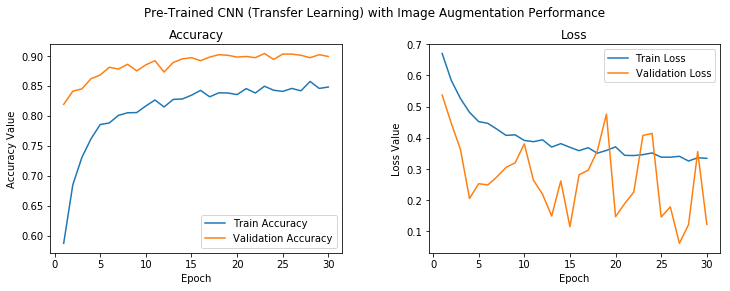

In [20]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Pre-Trained CNN (Transfer Learning) with Image Augmentation Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,31))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [21]:
model.save('cats_dogs_tlearn_img_aug_cnn.h5')

### 4. Transfer with partial training

In [22]:
# Unfreezing block4 and block5 for training
vgg_model.trainable = True

set_trainable = False
for layer in vgg_model.layers:
    if layer.name in ['block5_conv1', 'block4_conv1']:
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
        
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable']) 

,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x7f1ae4776d68>,input_3,False
1,<keras.layers.convolutional.Conv2D object at 0x7f1b28767710>,block1_conv1,False
2,<keras.layers.convolutional.Conv2D object at 0x7f1b200595f8>,block1_conv2,False
3,<keras.layers.pooling.MaxPooling2D object at 0x7f1b2858e978>,block1_pool,False
4,<keras.layers.convolutional.Conv2D object at 0x7f1b286e3ba8>,block2_conv1,False
5,<keras.layers.convolutional.Conv2D object at 0x7f1ae415db38>,block2_conv2,False
6,<keras.layers.pooling.MaxPooling2D object at 0x7f1ae410a898>,block2_pool,False
7,<keras.layers.convolutional.Conv2D object at 0x7f1ae410a9e8>,block3_conv1,False
8,<keras.layers.convolutional.Conv2D object at 0x7f1ae40c76a0>,block3_conv2,False
9,<keras.layers.convolutional.Conv2D object at 0x7f1ae40c7da0>,block3_conv3,False


In [23]:
#Set data generator
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')
val_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow(train_imgs, train_labels_enc, batch_size=30)
val_generator = val_datagen.flow(validation_imgs, validation_labels_enc, batch_size=20)

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

model = Sequential()
model.add(vgg_model)
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['accuracy'])
              
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30,
                              validation_data=val_generator, validation_steps=50, 
                              verbose=1)

Epoch 1/30
100/100 [==============================] - 148s 1s/step - loss: 0.6415 - accuracy: 0.6117 - val_loss: 0.3324 - val_accuracy: 0.8610
Epoch 2/30
100/100 [==============================] - 147s 1s/step - loss: 0.4312 - accuracy: 0.7963 - val_loss: 0.2616 - val_accuracy: 0.9170
Epoch 3/30
100/100 [==============================] - 148s 1s/step - loss: 0.3399 - accuracy: 0.8527 - val_loss: 0.2687 - val_accuracy: 0.8320
Epoch 4/30
100/100 [==============================] - 148s 1s/step - loss: 0.2926 - accuracy: 0.8693 - val_loss: 0.0793 - val_accuracy: 0.9180
Epoch 5/30
100/100 [==============================] - 147s 1s/step - loss: 0.2789 - accuracy: 0.8753 - val_loss: 0.0415 - val_accuracy: 0.9400
Epoch 6/30
100/100 [==============================] - 148s 1s/step - loss: 0.2446 - accuracy: 0.8960 - val_loss: 0.1984 - val_accuracy: 0.9240
Epoch 7/30
100/100 [==============================] - 148s 1s/step - loss: 0.2068 - accuracy: 0.9127 - val_loss: 0.0073 - val_accuracy: 0.9470

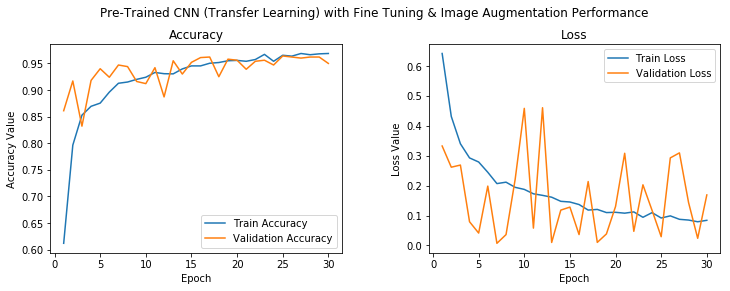

In [24]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Pre-Trained CNN (Transfer Learning) with Fine Tuning & Image Augmentation Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,31))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [25]:
model.save('cats_dogs_tlearn_finetune_img_aug_cnn.h5')

### 5. Results comparaison

In [26]:
# load dependencies
import glob
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array, array_to_img
from keras.models import load_model
import model_evaluation_utils as meu
%matplotlib inline

# load saved models
tl_cnn = load_model('cats_dogs_tlearn_basic_cnn.h5')
tl_img_aug_cnn = load_model('cats_dogs_tlearn_img_aug_cnn.h5')
tl_img_aug_finetune_cnn = load_model('cats_dogs_tlearn_finetune_img_aug_cnn.h5')

# load other configurations
IMG_DIM = (150, 150)
input_shape = (150, 150, 3)
num2class_label_transformer = lambda l: ['cat' if x == 0 else 'dog' for x in l]
class2num_label_transformer = lambda l: [0 if x == 'cat' else 1 for x in l]

# load VGG model for bottleneck features
from keras.applications import vgg16
from keras.models import Model
import keras

vgg = vgg16.VGG16(include_top=False, weights='imagenet', 
                  input_shape=input_shape)
output = vgg.layers[-1].output
output = keras.layers.Flatten()(output)
vgg_model = Model(vgg.input, output)
vgg_model.trainable = False

def get_bottleneck_features(model, input_imgs):
    features = model.predict(input_imgs, verbose=0)
    return features

/home/acluzel/anaconda3/lib/python3.5/site-packages/keras/engine/saving.py:384: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [27]:
IMG_DIM = (150, 150)

test_files = glob.glob('test_data/*')
test_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in test_files]
test_imgs = np.array(test_imgs)
test_labels = [fn.split('/')[1].split('.')[0].strip() for fn in test_files]

test_imgs_scaled = test_imgs.astype('float32')
test_imgs_scaled /= 255
test_labels_enc = class2num_label_transformer(test_labels)

print('Test dataset shape:', test_imgs.shape)
print(test_labels[0:5], test_labels_enc[0:5])

Test dataset shape: (1000, 150, 150, 3)
['cat', 'dog', 'dog', 'cat', 'dog'] [0, 1, 1, 0, 1]


In [28]:
test_bottleneck_features = get_bottleneck_features(vgg_model, test_imgs_scaled)

predictions = tl_cnn.predict_classes(test_bottleneck_features, verbose=0)
predictions = num2class_label_transformer(predictions)
meu.display_model_performance_metrics(true_labels=test_labels, predicted_labels=predictions, 
                                      classes=list(set(test_labels)))

Model Performance metrics:
------------------------------
Accuracy: 0.901
Precision: 0.9011
Recall: 0.901
F1 Score: 0.901

Model Classification report:
------------------------------
              precision    recall  f1-score   support

         cat       0.89      0.91      0.90       500
         dog       0.91      0.89      0.90       500

   micro avg       0.90      0.90      0.90      1000
   macro avg       0.90      0.90      0.90      1000
weighted avg       0.90      0.90      0.90      1000


Prediction Confusion Matrix:
------------------------------
            Predicted:     
                   cat  dog
Actual: cat  455        45 
        dog  54         446


In [29]:
predictions = tl_img_aug_cnn.predict_classes(test_imgs_scaled, verbose=0)
predictions = num2class_label_transformer(predictions)
meu.display_model_performance_metrics(true_labels=test_labels, predicted_labels=predictions, 
                                      classes=list(set(test_labels)))

Model Performance metrics:
------------------------------
Accuracy: 0.9
Precision: 0.9
Recall: 0.9
F1 Score: 0.9

Model Classification report:
------------------------------
              precision    recall  f1-score   support

         cat       0.90      0.90      0.90       500
         dog       0.90      0.90      0.90       500

   micro avg       0.90      0.90      0.90      1000
   macro avg       0.90      0.90      0.90      1000
weighted avg       0.90      0.90      0.90      1000


Prediction Confusion Matrix:
------------------------------
            Predicted:     
                   cat  dog
Actual: cat  449        51 
        dog  49         451


In [30]:
predictions = tl_img_aug_finetune_cnn.predict_classes(test_imgs_scaled, verbose=0)
predictions = num2class_label_transformer(predictions)
meu.display_model_performance_metrics(true_labels=test_labels, predicted_labels=predictions, 
                                      classes=list(set(test_labels)))

Model Performance metrics:
------------------------------
Accuracy: 0.948
Precision: 0.949
Recall: 0.948
F1 Score: 0.948

Model Classification report:
------------------------------
              precision    recall  f1-score   support

         cat       0.97      0.92      0.95       500
         dog       0.93      0.97      0.95       500

   micro avg       0.95      0.95      0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000


Prediction Confusion Matrix:
------------------------------
            Predicted:     
                   cat  dog
Actual: cat  462        38 
        dog  14         486


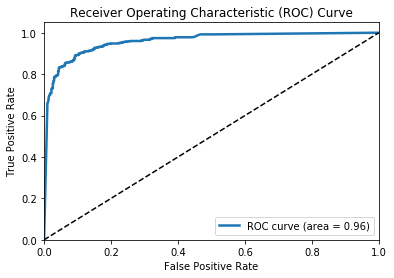

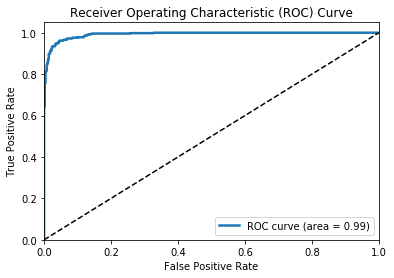

In [41]:
# worst model - Pre-trained CNN model as a Feature Extractor
def get_bottleneck_features(model, input_imgs):
    features = model.predict(input_imgs, verbose=0)
    return features
    
test_features_vgg = get_bottleneck_features(vgg_model, test_imgs_scaled)


meu.plot_model_roc_curve(tl_cnn, test_features_vgg, 
                         true_labels=test_labels_enc, 
                         class_names=[0, 1]) 

# best model - transfer learning with fine-tuning & image augmentation 
meu.plot_model_roc_curve(tl_img_aug_finetune_cnn, test_imgs_scaled, 
                         true_labels=test_labels_enc, 
                         class_names=[0, 1])